In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression as LinearRegression_sklearn

class LinearRegression():
    def __init__(self, x, y, lr, n_iterations):
        self.x = x
        self.y = y
        self.lr = lr
        self.n_iterations = n_iterations
        self.n_samples, self.n_features = x.shape
        self.weights = np.zeros(self.n_features)
        self.bias = 1
        self.errors = np.array([])

    def fit(self):
        for i in range(self.n_iterations):
            self.iteraition()
        return 0

    def iteraition(self):
        y_pred = np.dot(self.x, self.weights) + self.bias
        error = self.y - y_pred
        self.errors = np.append(self.errors, np.mean(np.abs(error)))
        self.update_coefficients(error)

    def predict(self, x):
        return np.dot(x, self.weights) + self.bias

    def update_coefficients(self, error):
        mae_gradient = -np.sign(error)
        weights_gradient = (1 / self.n_samples) * np.dot(self.x.T, mae_gradient)
        bias_gradient = (1 / self.n_samples) * np.sum(mae_gradient)
        self.weights -= self.lr * weights_gradient
        self.bias -= self.lr * bias_gradient
        return 0

In [6]:
# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Train Scikit-Learn linear regression model
lr_sklearn = LinearRegression_sklearn()
lr_sklearn.fit(X, y)
y_pred_sklearn = lr_sklearn.predict(X)

# Train custom linear regression model
lr_custom = LinearRegression(X, y, lr=1, n_iterations=100000)
lr_custom.fit()
y_pred_custom = lr_custom.predict(X)

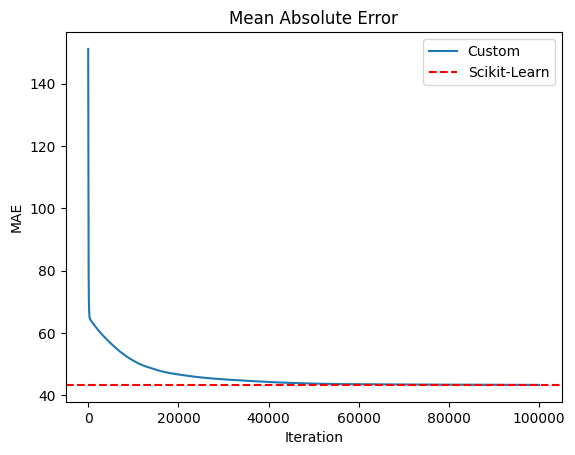

In [7]:
# Compare two models with plot and analysis
plt.plot(lr_custom.errors, label='Custom')
plt.axhline(y=np.mean(np.abs(y - y_pred_sklearn)), color='r', linestyle='--', label='Scikit-Learn')
plt.title('Mean Absolute Error')
plt.xlabel('Iteration')
plt.ylabel('MAE')
plt.legend()
plt.show()

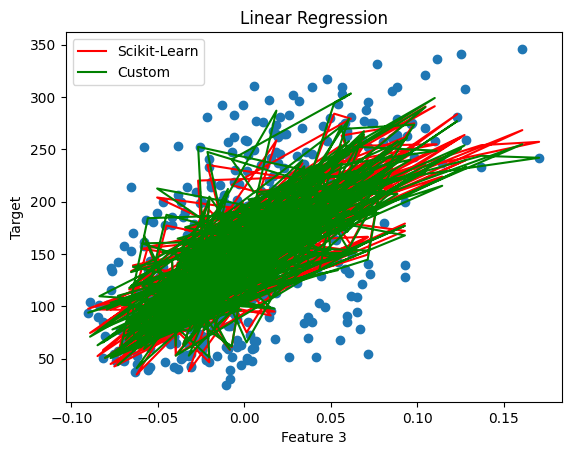

In [8]:
# Plot linear regression line with both models
plt.scatter(X[:, 2], y)
plt.plot(X[:, 2], y_pred_sklearn, color='r', label='Scikit-Learn')
plt.plot(X[:, 2], y_pred_custom, color='g', label='Custom')
plt.title('Linear Regression')
plt.xlabel('Feature 3')
plt.ylabel('Target')
plt.legend()
plt.show()